In [1]:
# For interactive plots, comment the next line
%pylab inline
# For interactive plots, uncomment the next line
# %pylab ipympl
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to access a repository of terrain data stored on S3. 

Specifically, this example will demonstrate:

* Retrieving a subset of data over arbitrary coordinates
* Plotting retrieved data with state boundaries overlaid using the `cartopy` library
* How to retrieve a single file as stored on S3

# Terrain Tiles

A global dataset providing bare-earth terrain heights, tiled for easy usage and provided on S3.

Source: https://registry.opendata.aws/terrain-tiles/

- Description
    - Gridded elevation tiles
- Resource type
    - S3 Bucket
- Amazon Resource Name (ARN)
    - `arn:aws:s3:::elevation-tiles-prod`
- AWS Region
    - `us-east-1`

## TerrainTiles

Select multiple terrain tiles based on arbitrary podpac Coordinates

In [2]:
from podpac.datalib.terraintiles import TerrainTiles
from podpac import Coordinates, clinspace

In [3]:
# create terrain tiles node
node = TerrainTiles(tile_format='geotiff', zoom=8)

# create coordinates to get tiles
c = Coordinates([clinspace(40, 43, 1000), clinspace(-76, -72, 1000)], dims=['lat', 'lon'])

# evaluate node
o = node.eval(c)

INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/geotiff/8/73/94.tif
INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/geotiff/8/74/94.tif
INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/geotiff/8/75/94.tif
INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/geotiff/8/76/94.tif
INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/geotiff/8/73/95.tif
INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/geotiff/8/74/95.tif
INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/geotiff/8/75/95.tif
INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/geotiff/8/76/95.tif
INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/geotiff/8/73/96.tif
INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/

In [4]:
o

<xarray.UnitsDataArray (lat: 1000, lon: 1000)>
array([[183., 198., 209., ..., -83., -84., -85.],
       [161., 158., 168., ..., -82., -83., -83.],
       [137., 139., 150., ..., -82., -82., -83.],
       ...,
       [232., 224., 177., ..., 424., 355., 333.],
       [199., 199., 181., ..., 395., 341., 331.],
       [203., 204., 175., ..., 378., 320., 331.]])
Coordinates:
  * lat      (lat) float64 40.0 40.0 40.01 40.01 40.01 ... 42.99 42.99 43.0 43.0
  * lon      (lon) float64 -76.0 -76.0 -75.99 -75.99 ... -72.01 -72.0 -72.0
Attributes:
    layer_style:   <podpac.core.style.Style object at 0x000001A4B1206248>
    crs:           EPSG:4326
    geotransform:  (-76.002002002002, 0.004004004004004004, 0.0, 39.998498498...

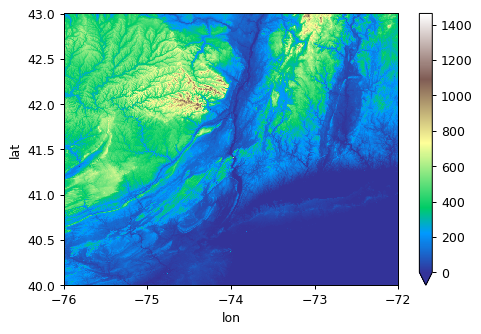

In [5]:
# plot the elevation
fig = plt.figure(dpi=90)
o.plot(vmin=0, cmap='terrain')
pass

# Plotting results with `cartopy`

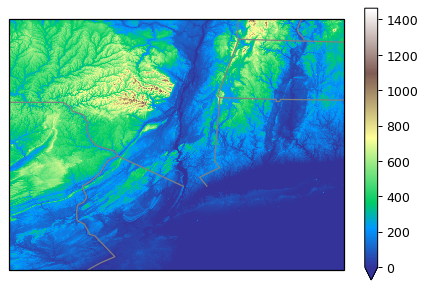

In [6]:
# plot with state boundaries data
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# create the figure
fig = plt.figure(dpi=90)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# set bounds using output
lat_bounds = [o['lat'].min(), o['lat'].max()]
lon_bounds = [o['lon'].min(), o['lon'].max()]
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

# ax.add_feature(rivers, edgecolor='red', linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')

o.plot(vmin=0, cmap='terrain')
pass

# Download source files locally

In [7]:
# download active source files locally
# you must evaluate the node at coordinates for sources to be defined
node.download()

## Retrieving a single file using `TerrainTilesSource`

Load one individual tile from the TerrainTiles set

In [8]:
from podpac.datalib.terraintiles import TerrainTilesSource

In [9]:
# select a single source from S3 bucket url  
# see `terraintiles.get_tile_urls(...)` below for getting tile endpoints
node = TerrainTilesSource(source='s3://elevation-tiles-prod/geotiff/8/75/95.tif')

# evaluate at its native coordinates
c = node.coordinates.transform('epsg:4326')
output = node.eval(c)

INFO:podpac.core.data.file_source:Loading AWS resource: s3://elevation-tiles-prod/geotiff/8/75/95.tif


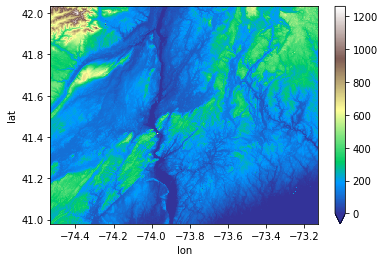

In [16]:
# plot the gridded output data
output.plot(vmin=0, cmap='terrain')
pass

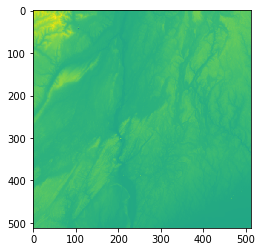

In [11]:
# plot the original raster image using the
# `node` reference to the rasterio dataset
plt.imshow(node.dataset.read(1))
pass

## Utilities

In [12]:
from podpac.datalib import terraintiles
from podpac.coordinates import Coordinates, clinspace

In [13]:
# available tile formats
terraintiles.TerrainTiles.tile_format.values

['geotiff', 'terrarium', 'normal']

In [14]:
# get all tile urls for tile format ('geotiff') certain zoom level (1)
terraintiles.get_tile_urls('geotiff', 1)

['geotiff/1/0/-10.tif',
 'geotiff/1/1/-10.tif',
 'geotiff/1/2/-10.tif',
 'geotiff/1/0/-9.tif',
 'geotiff/1/1/-9.tif',
 'geotiff/1/2/-9.tif',
 'geotiff/1/0/-8.tif',
 'geotiff/1/1/-8.tif',
 'geotiff/1/2/-8.tif',
 'geotiff/1/0/-7.tif',
 'geotiff/1/1/-7.tif',
 'geotiff/1/2/-7.tif',
 'geotiff/1/0/-6.tif',
 'geotiff/1/1/-6.tif',
 'geotiff/1/2/-6.tif',
 'geotiff/1/0/-5.tif',
 'geotiff/1/1/-5.tif',
 'geotiff/1/2/-5.tif',
 'geotiff/1/0/-4.tif',
 'geotiff/1/1/-4.tif',
 'geotiff/1/2/-4.tif',
 'geotiff/1/0/-3.tif',
 'geotiff/1/1/-3.tif',
 'geotiff/1/2/-3.tif',
 'geotiff/1/0/-2.tif',
 'geotiff/1/1/-2.tif',
 'geotiff/1/2/-2.tif',
 'geotiff/1/0/-1.tif',
 'geotiff/1/1/-1.tif',
 'geotiff/1/2/-1.tif',
 'geotiff/1/0/0.tif',
 'geotiff/1/1/0.tif',
 'geotiff/1/2/0.tif',
 'geotiff/1/0/1.tif',
 'geotiff/1/1/1.tif',
 'geotiff/1/2/1.tif',
 'geotiff/1/0/2.tif',
 'geotiff/1/1/2.tif',
 'geotiff/1/2/2.tif',
 'geotiff/1/0/3.tif',
 'geotiff/1/1/3.tif',
 'geotiff/1/2/3.tif',
 'geotiff/1/0/4.tif',
 'geotiff/1/1/4.tif',

In [15]:
# create coordinates for region
c = Coordinates([clinspace(43, 40, 1000), clinspace(-73, -72, 1000)], dims=['lat', 'lon'])

# get all tile urls for tile format ('geotiff') certain zoom level (9) within coordinates
terraintiles.get_tile_urls('geotiff', 9, coordinates=c)

['geotiff/9/152/188.tif',
 'geotiff/9/153/188.tif',
 'geotiff/9/152/189.tif',
 'geotiff/9/153/189.tif',
 'geotiff/9/152/190.tif',
 'geotiff/9/153/190.tif',
 'geotiff/9/152/191.tif',
 'geotiff/9/153/191.tif',
 'geotiff/9/152/192.tif',
 'geotiff/9/153/192.tif',
 'geotiff/9/152/193.tif',
 'geotiff/9/153/193.tif']